Build a generative adversarial network (GAN) to generate digit images from a noise distribution with TensorFlow.



*References*:

* Generative adversarial nets. I Goodfellow, J Pouget-Abadie, M Mirza, B Xu, D Warde-Farley, S Ozair, Y. Bengio. Advances in neural information processing systems, 2672-2680.
* Understanding the difficulty of training deep feedforward neural networks. X Glorot, Y Bengio. Aistats 9, 249-256


In [0]:
from __future__ import print_function, absolute_import, division

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("/tmp/data/", one_hot=True)

W0820 20:13:52.160975 140074131830656 deprecation.py:323] From <ipython-input-2-9be85178da70>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0820 20:13:52.162314 140074131830656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0820 20:13:52.163317 140074131830656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruction

Extracting /tmp/data/train-images-idx3-ubyte.gz


W0820 20:13:52.461559 140074131830656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0820 20:13:52.464764 140074131830656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0820 20:13:52.511097 140074131830656 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: __init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a f

Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [0]:
# training hyperparameters
num_steps = 65000
batch_size = 128
learning_rate = 0.0002

# network parameters
image_dim = 784
gen_hidden_dim=256
disc_hidden_dim=256
noise_dim=100

# custom initialization (Xavier Glorot initialization)
def glorot_init(shape):
  return tf.random_normal(shape=shape, stddev=1./tf.sqrt(shape[0]/2))


In [0]:
# store layer weights and biases
weights = {
    'gen_hidden_1':tf.Variable(glorot_init([noise_dim, gen_hidden_dim])),
    'gen_out': tf.Variable(glorot_init([gen_hidden_dim, image_dim])),
    'disc_hidden_1': tf.Variable(glorot_init([image_dim, disc_hidden_dim])),
    'disc_out' : tf.Variable(glorot_init([disc_hidden_dim, 1])),
}

bias = {
    'gen_hidden_1':tf.Variable(tf.zeros([gen_hidden_dim])),
    'gen_out':tf.Variable(tf.zeros([image_dim])),
    'disc_hidden_1':tf.Variable(tf.zeros([disc_hidden_dim])),
    'disc_out':tf.Variable(tf.zeros([1])),
    
}

In [0]:
# create generator
def generator(x):
  hidden_layer = tf.matmul(x, weights['gen_hidden_1'])
  hidden_layer = tf.add(hidden_layer, bias['gen_hidden_1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  
  out_layer = tf.matmul(hidden_layer, weights['gen_out'])
  out_layer = tf.add(out_layer, bias['gen_out'])
  out_layer = tf.nn.sigmoid(out_layer)
  
  return out_layer

# create discriminator
def discriminator(x):
  hidden_layer = tf.matmul(x, weights['disc_hidden_1'])
  hidden_layer = tf.add(hidden_layer, bias['disc_hidden_1'])
  hidden_layer = tf.nn.relu(hidden_layer)
  
  out_layer = tf.matmul(hidden_layer, weights['disc_out'])
  out_layer = tf.add(out_layer, bias['disc_out'])
  out_layer = tf.nn.sigmoid(out_layer)
  
  return out_layer

In [0]:
# build network

# network inputs
gen_input = tf.placeholder(tf.float32, shape =[None, noise_dim], 
                           name='input_noise')
disc_input = tf.placeholder(tf.float32, shape=[None, image_dim],
                           name='disc_input')

# build generator network
gen_sample = generator(gen_input)

# build 2 discriminator networks (one from noise input, one from generated samples)
disc_real = discriminator(disc_input)
disc_fake = discriminator(gen_sample)

# build loss
gen_loss = -tf.reduce_mean(tf.log(disc_fake))
disc_loss = -tf.reduce_mean(tf.log(disc_real)+ tf.log(1.0 - disc_fake))

# build optimizers
optimizer_gen = tf.train.AdamOptimizer(learning_rate = learning_rate)
optimizer_disc=tf.train.AdamOptimizer(learning_rate = learning_rate)

# train variables for each optimizer
# by default in tensorflow, all variables are updated by each optimizer,
# so we need to specify for each one of them the corresponding variables to
# update

# generator network variables
gen_vars = [weights['gen_hidden_1'], weights['gen_out'],
           bias['gen_hidden_1'], bias['gen_out']]

# discriminator network variables
disc_vars = [weights['disc_hidden_1'], weights['disc_out'],
             bias['disc_hidden_1'], bias['disc_out']]

#create training operations
train_gen = optimizer_gen.minimize(gen_loss, var_list=gen_vars)
train_disc = optimizer_disc.minimize(disc_loss, var_list=disc_vars)

init = tf.global_variables_initializer()

Step 1 Generator loss 0.55665845 Discriminator loss 1.4112484
Step 2000 Generator loss 4.7609076 Discriminator loss 0.032849953
Step 4000 Generator loss 4.3210726 Discriminator loss 0.05319675
Step 6000 Generator loss 3.4679523 Discriminator loss 0.13558125
Step 8000 Generator loss 3.292874 Discriminator loss 0.24784315
Step 10000 Generator loss 4.093201 Discriminator loss 0.09823951
Step 12000 Generator loss 3.3236246 Discriminator loss 0.27313673
Step 14000 Generator loss 3.7682214 Discriminator loss 0.25052544
Step 16000 Generator loss 3.3911061 Discriminator loss 0.27736008
Step 18000 Generator loss 3.6717641 Discriminator loss 0.23557925
Step 20000 Generator loss 3.9974973 Discriminator loss 0.3028608
Step 22000 Generator loss 3.902689 Discriminator loss 0.18167815
Step 24000 Generator loss 3.942333 Discriminator loss 0.15715481
Step 26000 Generator loss 3.636994 Discriminator loss 0.24623874
Step 28000 Generator loss 3.9382393 Discriminator loss 0.21390484
Step 30000 Generator lo

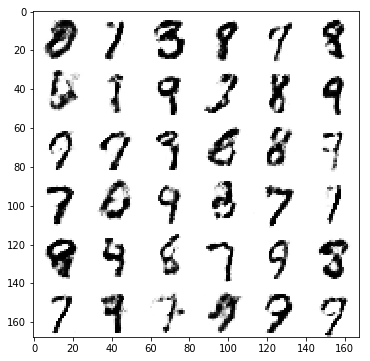

In [7]:
sess = tf.Session()

sess.run(init)

for i in range(1, num_steps+1):
  #prepare data
  #get next batch of mnist dataset (only images are needed not labels)
  batch_x, _ = mnist.train.next_batch(batch_size)
  #generate noise to feed to generator
  z=np.random.uniform(-1.0, 1, size=[batch_size, noise_dim])
  
  
  #train
  feed_dict = {disc_input:batch_x, gen_input:z}
  _, _, gl, dl = sess.run([train_gen, train_disc, gen_loss, disc_loss],
                         feed_dict = feed_dict)
  
  if i%2000 ==0 or i==1:
    print("Step",i, "Generator loss", gl, "Discriminator loss", dl)
  
# testing
#generate images from noise, using generator network

n = 6
canvas = np.empty((28*n, 28*n))

for i in range(n):
  # noise input
  z = np.random.uniform(-1.0,1.0,size=[n, noise_dim])
  # generate image from noise
  g = sess.run(gen_sample, feed_dict = {gen_input:z})
  
  #reverse color for better display
  g = -1 * (g-1)
  
  for j in range(n):
    #draw the generated digits
    canvas[i*28:(i+1)*28, j*28:(j+1)*28] = g[j].reshape([28,28])
    
plt.figure(figsize=(n,n))
plt.imshow(canvas, origin= "upper", cmap="gray")
plt.show()  